In [1]:
## On Not being able to use python for Despina's. She said in L10 that the only thing she wants to see is that we've done it and that it wont be marked.
## Only assessed on whether it works or not

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from datetime import datetime, time 

## Importing hand-made modules
import sys
scraper_modules_path = 'C:/Users/ABour/Desktop/Energy Systems & Data Analytics/Modules/Energy Analysis - Aidan/Smart Meters/custom_modules'
if scraper_modules_path not in sys.path:
    sys.path.append(scraper_modules_path)

import pre_processing as pp
import feature_gen as fg

<br>

### Pre-processing & EDA

In [2]:
df_smart_meters = pd.read_csv('data/smart_meters_subset.csv', parse_dates=['datetime'])
df_smart_meters = df_smart_meters.drop(columns=['tariff', 'acorn', 'acorn_group', 'SP']) # Won't exist in actual dataset entering this part of the pipeline, will be removed earlier
df_smart_meters

,id,datetime,kWh
0,MAC000002,2012-10-12 00:30:00,0.000
1,MAC000002,2012-10-12 01:00:00,0.000
2,MAC000002,2012-10-12 01:30:00,0.000
3,MAC000002,2012-10-12 02:00:00,0.000
4,MAC000002,2012-10-12 02:30:00,0.000
5,MAC000002,2012-10-12 03:00:00,0.000
6,MAC000002,2012-10-12 03:30:00,0.000
7,MAC000002,2012-10-12 04:00:00,0.000
8,MAC000002,2012-10-12 04:30:00,0.000
9,MAC000002,2012-10-12 05:00:00,0.000


In [3]:
process = True

if process == True:
    df_smart_meters = pp.generate_ts_features_df(df_smart_meters)
    df_smart_meters['kWh'] = df_smart_meters.kWh.replace('Null', None).astype(float)

df_smart_meters

,id,datetime,kWh,SP,DoW,DoY,month,weekend
0,MAC000002,2012-10-12 00:30:00,0.000,2,4,286,10,0
1,MAC000002,2012-10-12 01:00:00,0.000,3,4,286,10,0
2,MAC000002,2012-10-12 01:30:00,0.000,4,4,286,10,0
3,MAC000002,2012-10-12 02:00:00,0.000,5,4,286,10,0
4,MAC000002,2012-10-12 02:30:00,0.000,6,4,286,10,0
5,MAC000002,2012-10-12 03:00:00,0.000,7,4,286,10,0
6,MAC000002,2012-10-12 03:30:00,0.000,8,4,286,10,0
7,MAC000002,2012-10-12 04:00:00,0.000,9,4,286,10,0
8,MAC000002,2012-10-12 04:30:00,0.000,10,4,286,10,0
9,MAC000002,2012-10-12 05:00:00,0.000,11,4,286,10,0


C:\Users\ABour\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


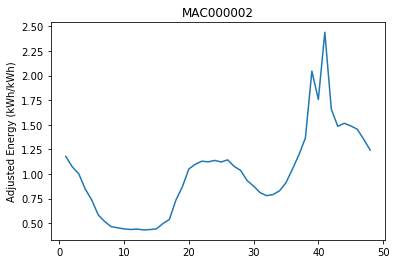

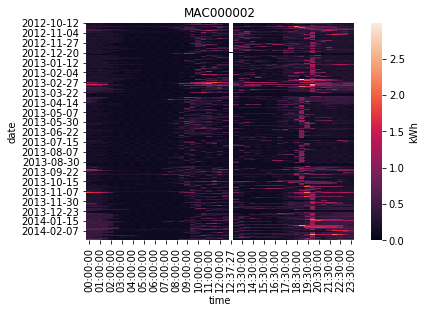

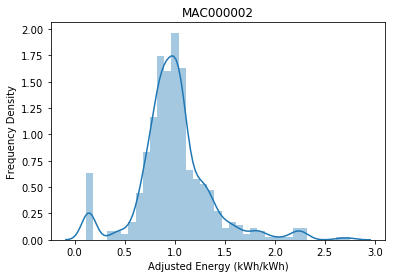

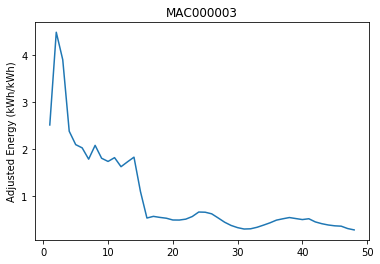

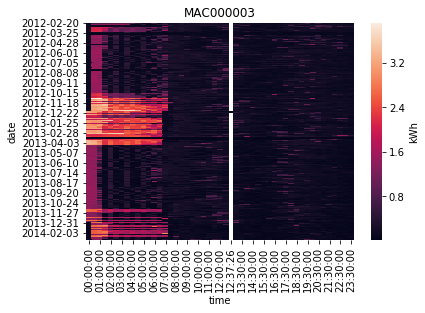

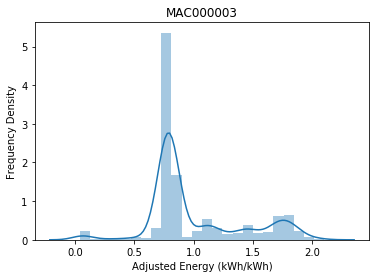

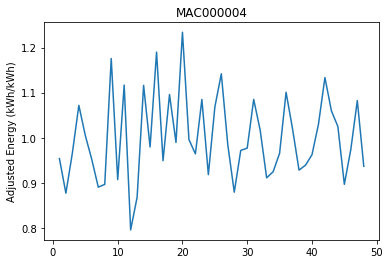

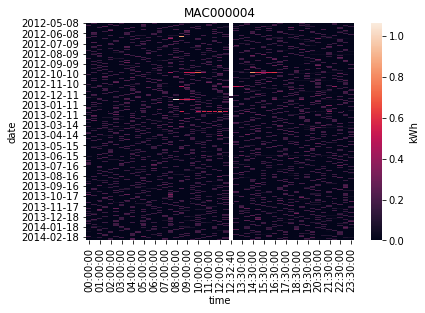

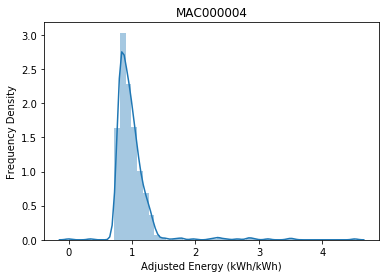

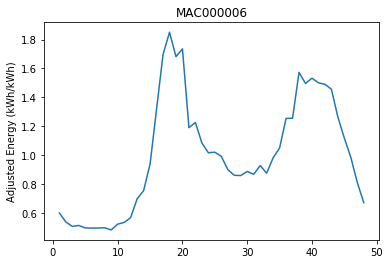

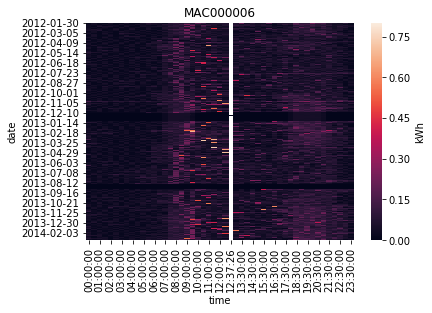

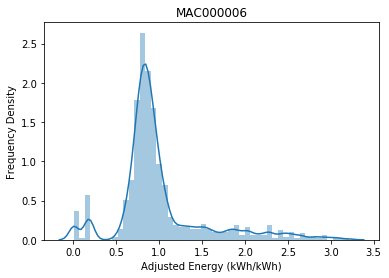

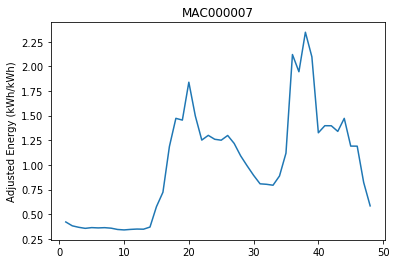

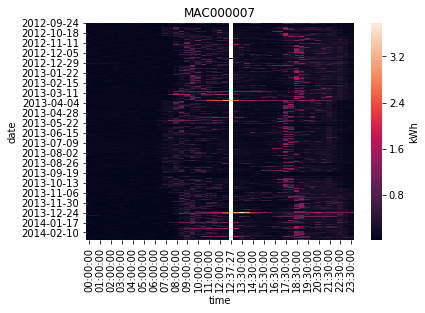

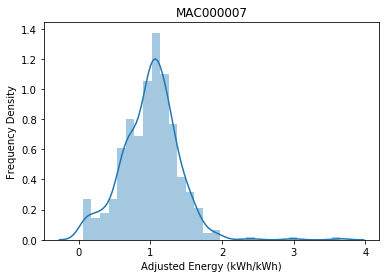

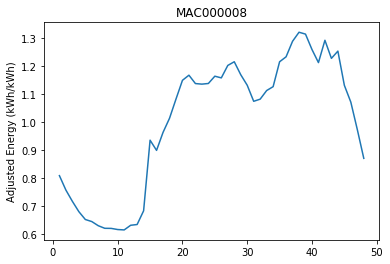

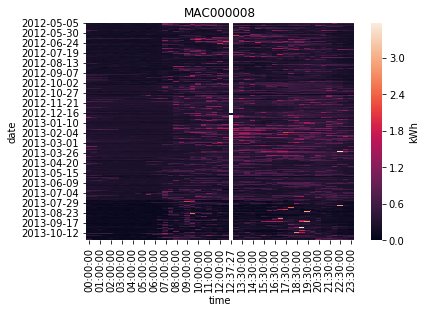

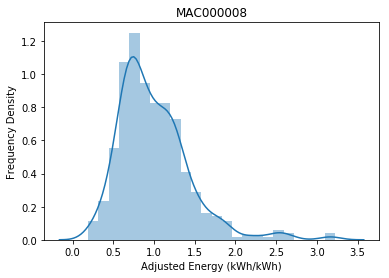

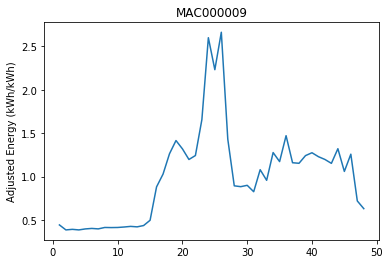

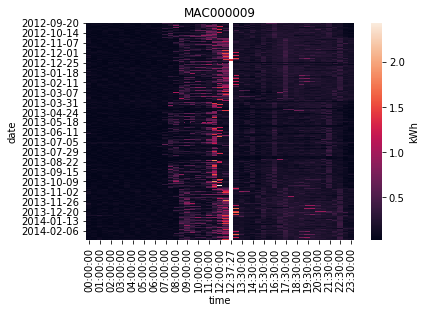

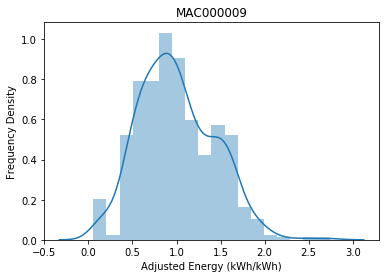

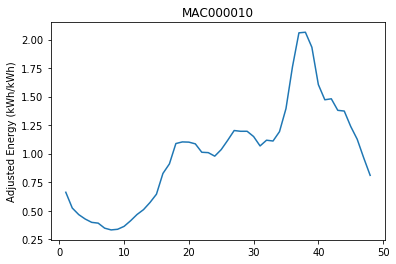

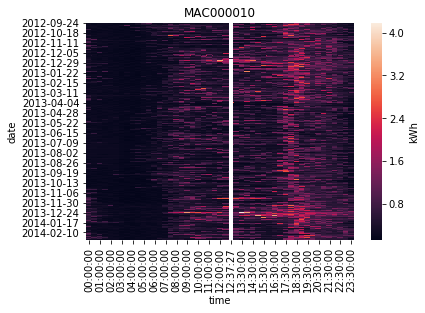

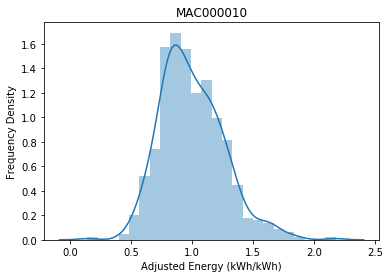

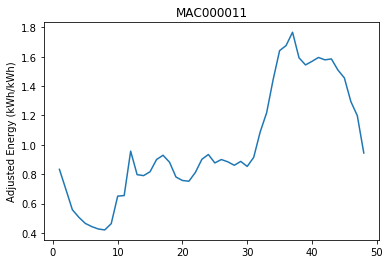

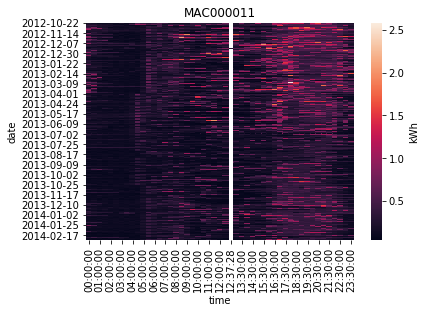

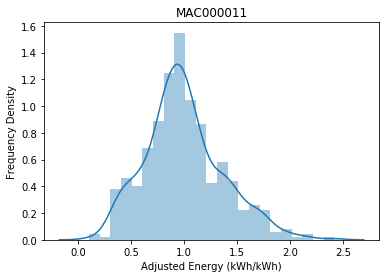

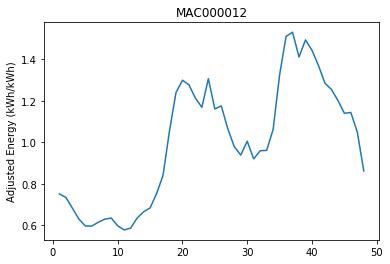

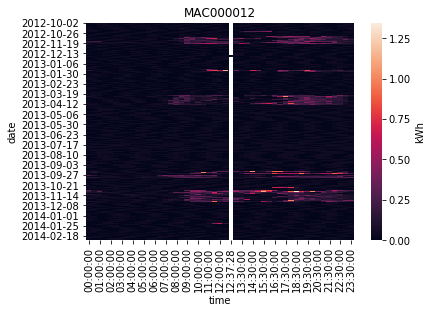

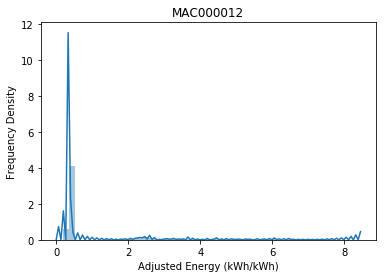

In [4]:
for _id in df_smart_meters.id.unique():
    ## Filter df for smart meter id
    df_smart_meter = df_smart_meters[df_smart_meters.id==_id]
    
    ## Plots
    pp.plot_SP_mean(_id, df_smart_meter)
    pp.plot_datetime_heatmap(_id, df_smart_meter)
    pp.plot_daily_peak_dist(_id, df_smart_meter)
    
## Try dropping zero values before

<br>

### Feature Generation

<img src="img/SMAP features.png">

In [5]:
## Creating array of SMAP feature keywords

## Need to add a pre-pre-filter for night & weekend combo, five so far
## They have mean daily maximum usage as well as mean peak usage, are they not the same? 
## Need a method to filter out peak usage
## Need to add seasonal filters

SMAP_features = np.array([
    [None, None, None, 'mean'], # Mean usage
    [None, None, None, 'var'], # Variance of usage
    [None, 'DoY', 'max', 'mean'], # Mean peak usage
    [None, 'DoY', 'max', 'var'], # Variance of peak usage
    ['day', None, None, 'mean'], # Mean night usage
    ['night', None, None, 'mean'], # Mean day usage
    ['day', None, None, 'var'], # Variance of night usage
    ['weekend', None, None, 'mean'], # Mean weekday usage
    ['weekend', None, None, 'var'], # Variance of weekday usage
    [None, 'DoY', 'min', 'mean'], # Mean trough usage
    [None, 'SP', 'var', 'mean'], # Mean of half-hourly coefficients of variation
    ['not_lunch', None, None, 'mean'], # Mean lunchtime usage
    [None, None, None, 'max'], # Peak usage
    [None, None, None, 'min'], # Trough usage
    ['night', None, None, 'var'], # Variance of day usage
    ['weekend', 'DoY', 'max', 'mean'], # Mean weekday peak usage
    ['weekend', 'DoY', 'max', 'var'], # Variance of weekday peak usage
    ['weekday', None, None, 'mean'], # Mean weekend usage
    ['weekday', None, None, 'var'], # Variance of weekend usage
    [None, 'SP', 'mean', None], # Mean of half-hourly usage
])

In [6]:
house_dict = dict()

for _id in df_smart_meters.id.unique():
    house_dict[_id] = dict() # Creating dictionary entry for new household id
    df_smart_meter = df_smart_meters[df_smart_meters.id==_id] # Filter df for smart meter id
    
    for i in range(SMAP_features.shape[0]):
        drop, time_step, time_step_feature, final_feature = SMAP_features[i]
        house_dict = fg.feature_gen(df_smart_meter, _id, house_dict, drop=drop, time_step=time_step, time_step_feature=time_step_feature, final_feature=final_feature)
        
house_dict

{'MAC000002': {'mean': 0.2525610978019692,
  'var': 0.06106707856635587,
  'DoY_max_combined_mean': 1.1280956303278693,
  'DoY_max_combined_var': 0.1956031807169099,
  'drop_day_combined_mean': 0.261428913854267,
  'drop_night_combined_mean': 0.2390106739849313,
  'drop_day_combined_var': 0.06976957144770234,
  'drop_weekend_combined_mean': 0.24644040371788106,
  'drop_weekend_combined_var': 0.058984885244114334,
  'DoY_min_combined_mean': 0.0760765027322405,
  'SP_var_combined_mean': 0.048770038735694264,
  'drop_not_lunch_combined_mean': 0.28123443721854285,
  'max': 2.9939999999999998,
  'min': 0.0,
  'drop_night_combined_var': 0.047471377764338345,
  'DoY_drop_weekend_max_combined_mean': 1.084703072696246,
  'DoY_drop_weekend_max_combined_var': 0.18369988559045883,
  'drop_weekday_combined_mean': 0.2678172618476233,
  'drop_weekday_combined_var': 0.0659401622372778,
  'SP_1_mean': 0.29753846134615397,
  'SP_2_mean': 0.270666003777336,
  'SP_3_mean': 0.2530437375745527,
  'SP_4_mean

In [7]:
df_households = pd.DataFrame(house_dict).T
df_households['day/night'] = df_households['drop_night_combined_mean']/df_households['drop_day_combined_mean']

df_households.index.name = 'household_id'
df_households

,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_11_mean,SP_12_mean,SP_13_mean,SP_14_mean,...,drop_not_lunch_combined_mean,drop_weekday_combined_mean,drop_weekday_combined_var,drop_weekend_combined_mean,drop_weekend_combined_var,max,mean,min,var,day/night
household_id,,,,,,,,,,,,,,,,,,,,,
MAC000002,1.084703,0.183700,1.128096,0.195603,0.076077,0.111453,0.109958,0.111085,0.108869,0.109789,...,0.281234,0.267817,0.065940,0.246440,0.058985,2.994,0.252561,0.000,0.061067,0.914247
MAC000003,2.028474,0.617751,2.221005,0.645825,0.041082,0.688474,0.720512,0.644071,0.685260,0.724518,...,0.239122,0.391339,0.380096,0.400169,0.377912,3.921,0.397658,0.007,0.378538,0.353108
MAC000004,0.244973,0.007362,0.260445,0.008986,0.000000,0.032086,0.039522,0.028138,0.030713,0.039501,...,0.037675,0.036183,0.005668,0.035068,0.005224,1.065,0.035386,0.000,0.005350,1.013585
MAC000006,0.295017,0.024538,0.312615,0.021210,0.011672,0.030975,0.031653,0.033671,0.041395,0.044755,...,0.057673,0.056968,0.002182,0.060465,0.002989,0.801,0.059470,0.000,0.002762,1.257365
MAC000007,1.083540,0.155989,1.119432,0.171728,0.032036,0.067209,0.068253,0.068937,0.068653,0.072942,...,0.248429,0.222229,0.074384,0.188131,0.046872,3.784,0.197808,0.015,0.054914,1.337060
MAC000008,1.173538,0.231600,1.251699,0.266600,0.172186,0.223647,0.223155,0.229172,0.230150,0.247889,...,0.426213,0.360521,0.062979,0.364131,0.056585,3.581,0.363101,0.000,0.058411,1.230245
MAC000009,0.905803,0.135046,0.965350,0.160767,0.036511,0.073952,0.074937,0.076196,0.075234,0.077939,...,0.377289,0.182352,0.032618,0.177596,0.027379,2.435,0.178952,0.027,0.028876,1.808374
MAC000010,1.899134,0.255525,1.975970,0.277218,0.148533,0.199451,0.226363,0.256689,0.280146,0.314501,...,0.615434,0.571337,0.204884,0.542100,0.177892,4.189,0.550398,0.113,0.185719,1.193630
MAC000011,1.107038,0.169332,1.139117,0.165201,0.074027,0.204469,0.205700,0.300675,0.250420,0.248369,...,0.278715,0.321274,0.069619,0.311534,0.068366,2.582,0.314297,0.040,0.068738,0.941611


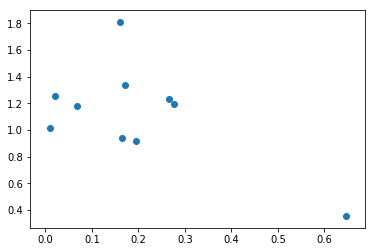

In [8]:
plt.scatter(df_households['DoY_max_combined_var'], df_households['day/night'])